# **FIONA HARIA | 60009220048 | D1-2 | D040**

# **Importing the Libaries**

In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fftshift, ifftshift, fft2, ifft2

# **Reading the image**

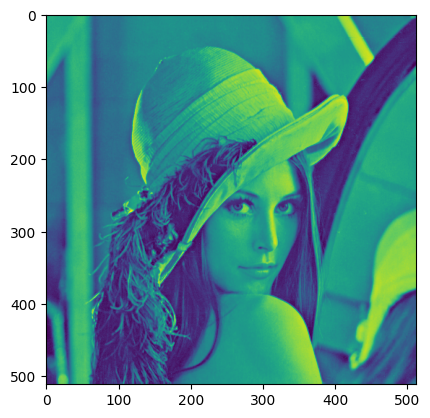

In [50]:
img = cv2.imread('/content/lena.png',cv2.IMREAD_GRAYSCALE)
plt.imshow(img)

In [52]:
def display_images(original, transformed, title_transformed):
    plt.figure(figsize=(10,5))

    plt.subplot(1,2,1)
    plt.imshow(original, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1,2,2)
    plt.imshow(transformed, cmap='gray')
    plt.title(title_transformed)

    plt.show()


# **Getting the fourier transformation**

In [53]:
def fourier_transform(image):
    f_transform = fft2(image)
    f_transform_shifted = fftshift(f_transform)
    return f_transform_shifted


In [62]:
f_transform_shifted = fourier_transform(img)

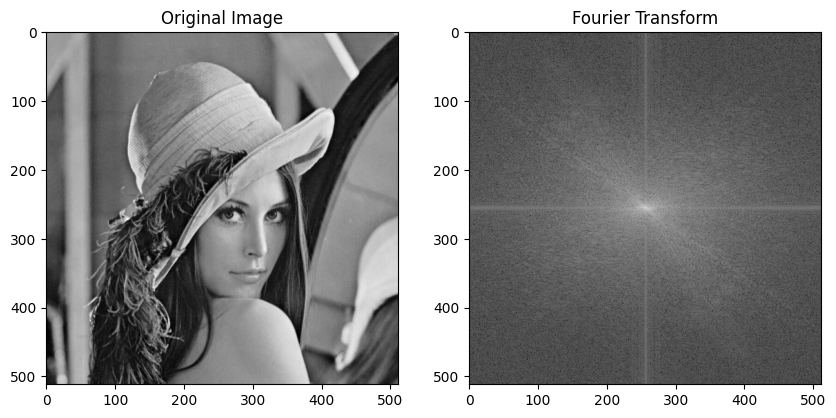

In [93]:
display_images(img, np.log(1+np.abs(f_transform_shifted)), 'Fourier Transform')

In [54]:
def inverse_fourier_transform(f_transform_shifted):
    f_ishift = ifftshift(f_transform_shifted)
    img_back = np.abs(ifft2(f_ishift))
    return img_back

# **Ideal Low Pass Filter**

In [56]:
def create_ideal_low_pass_mask(shape, radius):
    rows, cols = shape
    crow, ccol = rows // 2 , cols // 2
    mask = np.zeros((rows, cols), np.uint8)
    mask[crow-radius:crow+radius, ccol-radius:ccol+radius] = 1
    return mask

# **Multiplication between the fourier transformed input image and the filtering mask**

In [64]:
low_pass_mask = create_ideal_low_pass_mask(f_transform_shifted.shape, radius=30)
low_pass_filtered = f_transform_shifted * low_pass_mask

# **Taking inverse fourier transform of the convulated image**

In [65]:
img_low_pass = inverse_fourier_transform(low_pass_filtered)

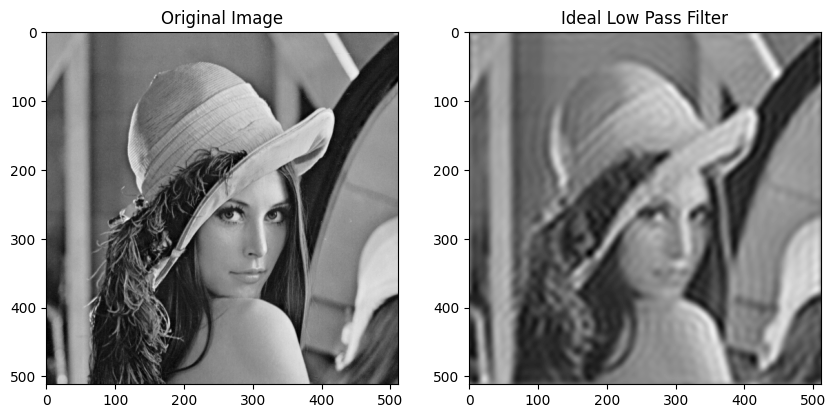

In [68]:
display_images(img, img_low_pass, "Ideal Low Pass Filter")

# **Ideal High Pass Filter**

In [57]:
def create_ideal_high_pass_mask(shape, radius):
    rows, cols = shape
    crow, ccol = rows // 2 , cols // 2
    mask = np.ones((rows, cols), np.uint8)
    mask[crow-radius:crow+radius, ccol-radius:ccol+radius] = 0
    return mask

# **Multiplication between the fourier transformed input image and the filtering mask**

In [70]:
high_pass_mask = create_ideal_high_pass_mask(f_transform_shifted.shape, radius=30)
high_pass_filtered = f_transform_shifted * high_pass_mask

# **Taking inverse fourier transform of the convulated image**

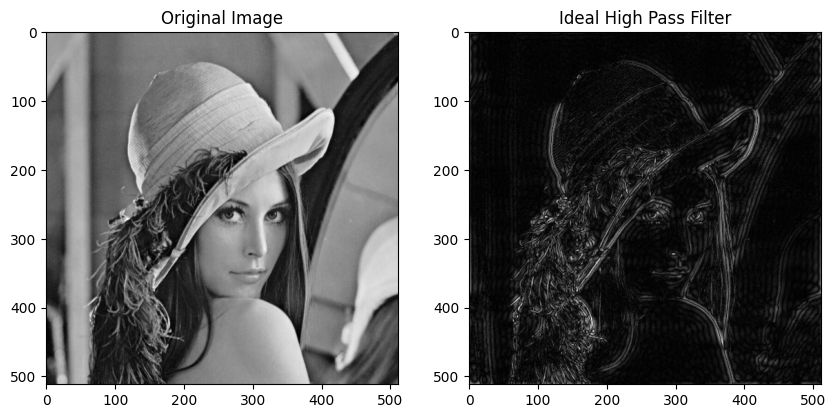

In [72]:
img_high_pass = inverse_fourier_transform(high_pass_filtered)
display_images(img, img_high_pass, "Ideal High Pass Filter")

# **Gaussian Low Pass Mask**

In [74]:
def create_gaussian_low_pass_mask(shape, sigma):
    rows, cols = shape
    crow, ccol = rows // 2 , cols // 2
    x, y = np.ogrid[:rows, :cols]
    mask = np.exp(-((x - crow) ** 2 + (y - ccol) ** 2) / (2.0 * sigma**2))
    return mask

# **Multiplication between the fourier transformed input image and the filtering mask**

In [75]:
gaussian_low_mask = create_gaussian_low_pass_mask(f_transform_shifted.shape, sigma=10)
gaussian_low_filtered = f_transform_shifted * gaussian_low_mask

# **Taking inverse fourier transform of the convulated image**

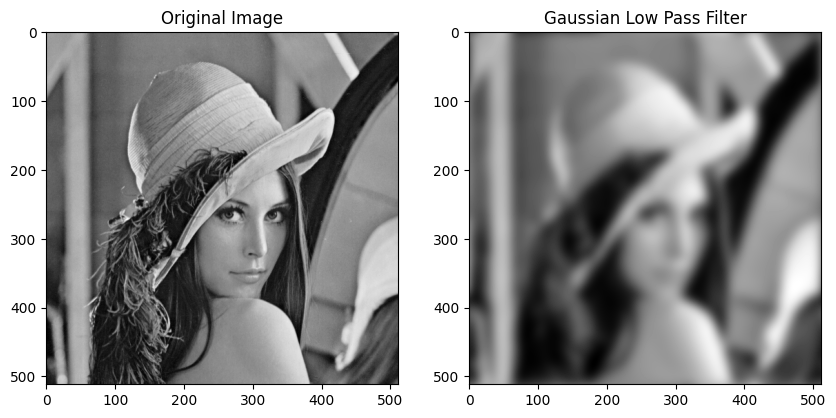

In [76]:
img_gaussian_low = inverse_fourier_transform(gaussian_low_filtered)
display_images(img, img_gaussian_low, "Gaussian Low Pass Filter")

# **Gaussian High Pass Mask**

In [59]:
def create_gaussian_high_pass_mask(shape, sigma):
    rows, cols = shape
    crow, ccol = rows // 2 , cols // 2
    x, y = np.ogrid[:rows, :cols]
    mask = 1 - np.exp(-((x - crow) ** 2 + (y - ccol) ** 2) / (2.0 * sigma**2))
    return mask

# **Multiplication between the fourier transformed input image and the filtering mask**

In [81]:
gaussian_high_mask = create_gaussian_high_pass_mask(f_transform_shifted.shape, sigma=10)
gaussian_high_filtered = f_transform_shifted * gaussian_high_mask

# **Taking inverse fourier transform of the convulated image**

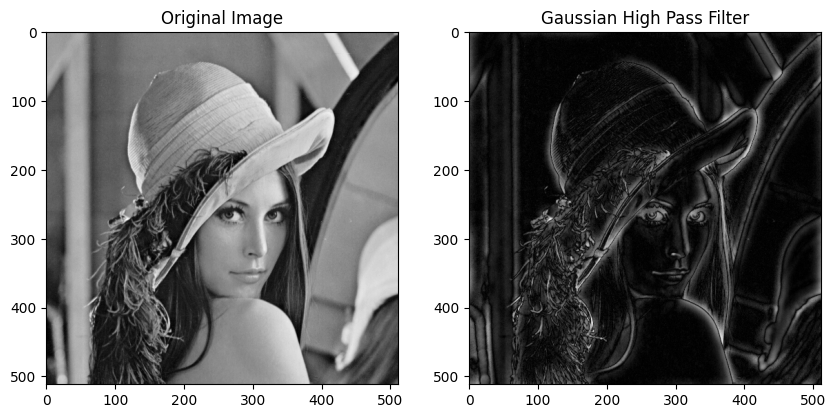

In [83]:
img_gaussian_high = inverse_fourier_transform(gaussian_high_filtered)
display_images(img, img_gaussian_high, "Gaussian High Pass Filter")

# **Displaying the transformations on the fashion mnist images**

In [84]:
from tensorflow.keras.datasets import fashion_mnist

In [85]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [86]:
random_image = x_test[0]

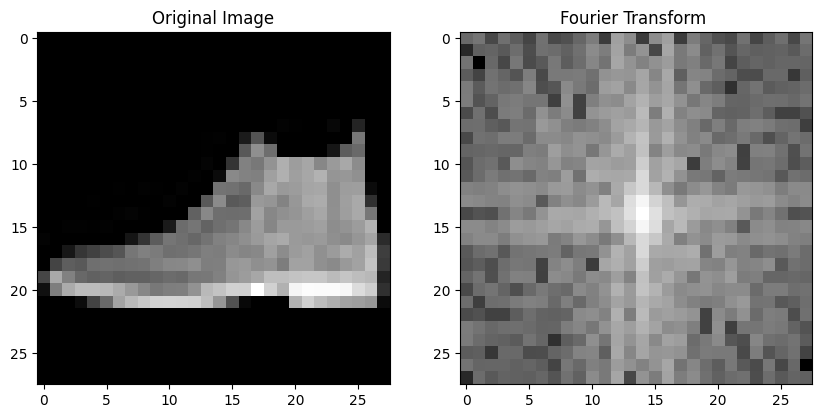

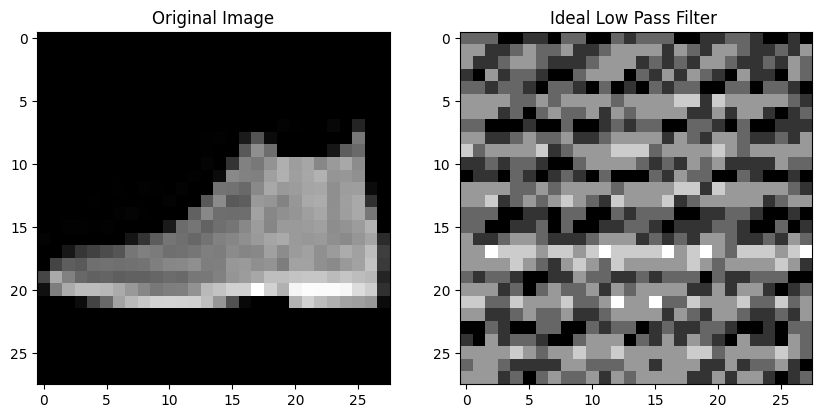

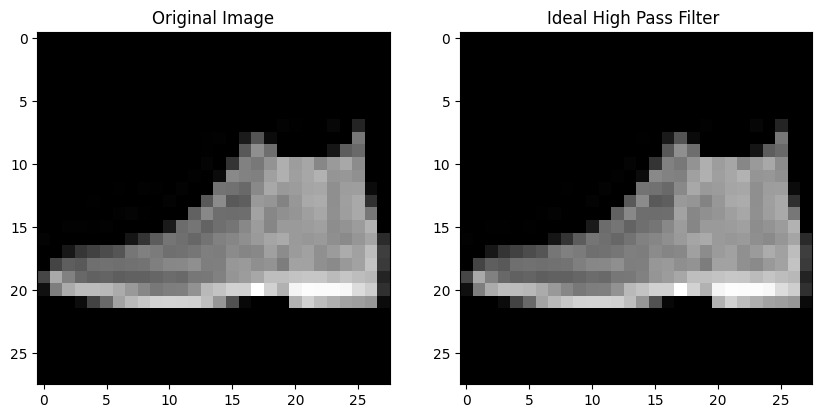

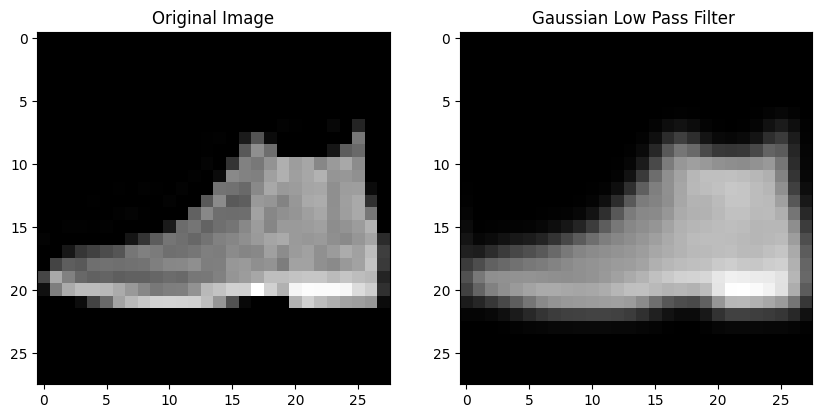

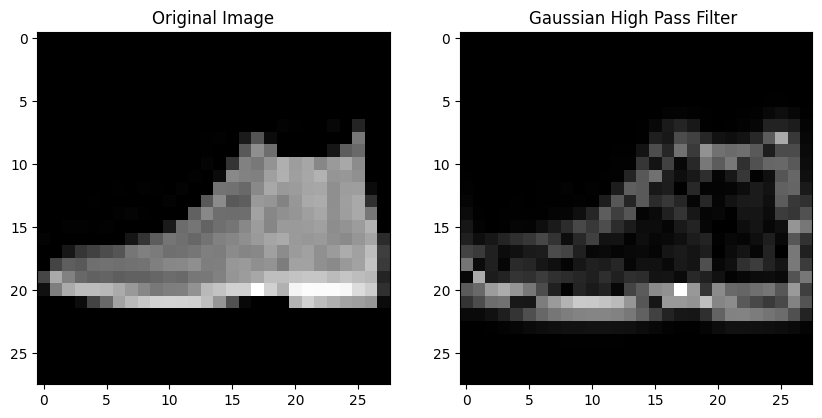

In [91]:
f_transform_shifted_fashion = fourier_transform(random_image)
display_images(random_image, np.log(np.abs(f_transform_shifted_fashion)), "Fourier Transform ")

low_pass_mask_fashion = create_ideal_low_pass_mask(f_transform_shifted_fashion.shape, radius=15)
low_pass_filtered_fashion = f_transform_shifted_fashion * low_pass_mask_fashion
img_low_pass_fashion = inverse_fourier_transform(low_pass_filtered_fashion)
display_images(random_image, img_low_pass_fashion, "Ideal Low Pass Filter ")

high_pass_mask_fashion = create_ideal_high_pass_mask(f_transform_shifted_fashion.shape, radius=15)
high_pass_filtered_fashion = f_transform_shifted_fashion * high_pass_mask_fashion
img_high_pass_fashion = inverse_fourier_transform(high_pass_filtered_fashion)
display_images(random_image, img_high_pass_fashion, "Ideal High Pass Filter ")

gaussian_low_mask_fashion = create_gaussian_low_pass_mask(f_transform_shifted_fashion.shape, sigma=5)
gaussian_low_filtered_fashion = f_transform_shifted_fashion * gaussian_low_mask_fashion
img_gaussian_low_fashion = inverse_fourier_transform(gaussian_low_filtered_fashion)
display_images(random_image, img_gaussian_low_fashion, "Gaussian Low Pass Filter ")

gaussian_high_mask_fashion = create_gaussian_high_pass_mask(f_transform_shifted_fashion.shape, sigma=5)
gaussian_high_filtered_fashion = f_transform_shifted_fashion * gaussian_high_mask_fashion
img_gaussian_high_fashion = inverse_fourier_transform(gaussian_high_filtered_fashion)
display_images(random_image, img_gaussian_high_fashion, "Gaussian High Pass Filter ")

# **APPLICATIONS**

1. Ideal Low Pass Filter (ILPF)
The Ideal Low Pass Filter (ILPF) is primarily used for noise reduction and image smoothing. It is particularly effective in medical imaging applications, such as MRI and CT scans, where high-frequency noise can obscure important details. By removing this noise, ILPF enhances image clarity, enabling better diagnostic accuracy. Additionally, it finds use in photography and video editing to create softer images by reducing harsh details. In motion detection systems, ILPF can also be employed for background subtraction, helping to isolate moving objects from a static background.

2. Ideal High Pass Filter (IHPF)
The Ideal High Pass Filter (IHPF) is widely utilized for edge detection and feature enhancement in computer vision applications. By amplifying high-frequency components, it highlights edges, which are crucial for tasks such as object recognition and image segmentation. IHPF is also commonly applied in facial recognition systems to enhance facial features, ensuring that important characteristics are clearly defined. Furthermore, this filter is frequently used in print and digital photography for image sharpening, improving the overall appearance of details and making images more visually appealing.

3. Gaussian Low Pass Filter (GLPF)
The Gaussian Low Pass Filter (GLPF) is favored for its ability to reduce noise while maintaining a more natural transition between filtered and non-filtered areas. This filter is particularly useful in medical imaging, where it enhances the visibility of anatomical structures by reducing noise in ultrasound images. In graphics software, GLPF is applied for image smoothing, creating soft focus effects that are desirable in portrait photography. Additionally, in video processing, GLPF stabilizes video frames by reducing jitter and noise, resulting in smoother playback and improved viewer experience.

4. Gaussian High Pass Filter (GHPF)
The Gaussian High Pass Filter (GHPF) excels in texture enhancement and is often used in material inspection, particularly in manufacturing settings, where it helps detect surface defects by amplifying high-frequency details. In remote sensing applications, GHPF enhances features in satellite imagery, facilitating better interpretation of land use and land cover. Moreover, this filter plays a critical role in augmented reality, as it assists in feature detection for overlaying virtual objects on real-world scenes, enhancing the interaction between digital and physical environments.



# **CONCLUSION**

In summary, these filtering techniques are instrumental across various domains, including medical imaging, computer vision, photography, and remote sensing. The Ideal Low Pass Filter improves diagnostic images by reducing noise, while the Ideal High Pass Filter aids in detecting and recognizing objects. The Gaussian Low Pass Filter enhances visual aesthetics in photography and stabilizes video playback, and the Gaussian High Pass Filter assists in texture enhancement and augmented reality applications. The versatility of these filters highlights their importance in modern image processing, allowing practitioners to tailor their approach based on specific application needs.






